Going off of the article here: https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0

This one is better I think - it has the actual docs: https://radimrehurek.com/gensim/auto_examples/tutorials/run_lda.html#sphx-glr-auto-examples-tutorials-run-lda-py 

This is also slightly more concise/clear than the top above: https://bennett-holiday.medium.com/a-step-by-step-guide-to-writing-an-lda-program-in-python-690aa99119ea 


In [29]:
import pandas as pd

articles = pd.read_csv('/Users/calebharding/Documents/BYU/2023-2024/China_Project/articles/process_articles/process_qiushi_articles/processed_qiushi_articles.csv')

In [30]:
# articles = articles.sample(10)
print(len(articles))
articles.head(1)

1998


,authors,title,date,year,edition,url,text,quarter,year_quarter,cleaned_text,cleaned_text_wspaces,unigram,bigram,unigram_count,bigram_count
0,['习近平'],辩证唯物主义是中国共产党人的世界观和方法论,2018-12-31,2019,1.0,http://www.qstheory.cn/dukan/qs/2018-12/31/c_1...,辩证唯物主义是中国共产党人的世界观和方法论习近平2018年5月4日，纪念马克思诞辰200周年...,1,2019 Q1,辩证唯物主义是中国共产党人的世界观和方法论习近平2018年5月4日纪念马克思诞辰200周年大...,辩证唯物主义 是 中国共产党 人 的 世界观 和 方法论 习近平 2018 年 5 月 4 ...,"['辩证唯物主义', '是', '中国共产党', '人', '的', '世界观', '和',...","['辩证唯物主义是', '是中国共产党', '中国共产党人', '人的', '的世界观', ...","{'的': 139, '和': 54, '我们': 32, '矛盾': 32, '是': 2...","{'客观实际': 8, '的矛盾': 7, '矛盾的': 7, '世界观和': 6, '和方..."


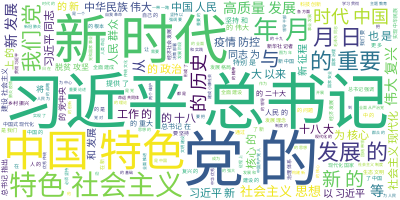

In [31]:
# make a word cloud... https://amueller.github.io/word_cloud/auto_examples/wordcloud_cn.html - one link, didn't seem to work
from wordcloud import WordCloud

long_string = ' '.join(list(articles["cleaned_text_wspaces"]))

font_path = '/Users/calebharding/Documents/BYU/2023-2024/China_Project/qiushi_venv/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/NotoSansSC-Regular.ttf'

# Create a WordCloud object
wordcloud = WordCloud(font_path=font_path, background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [32]:
import stopwordsiso
from stopwordsiso import stopwords

stopwords_zh = stopwords(["zh"])

In [33]:
def remove_stopwords(row_text):
    return [word for word in row_text.split(" ") if word not in stopwords_zh]

articles['cleaned_text_wspaces'] = articles['cleaned_text_wspaces'].apply(lambda row_text: remove_stopwords(row_text))

In [34]:
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
from gensim.utils import simple_preprocess
from gensim.models.ldamodel import LdaModel

In [35]:
docs = list(articles['cleaned_text_wspaces'])

In [36]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.DEBUG)


In [37]:
# Compute bigrams.
from gensim.models import Phrases

# Add bigrams and trigrams to docs (only ones that appear 20 times or more).
bigram = Phrases(docs, min_count=20)
for idx in range(len(docs)):
    for token in bigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)

2024-03-30 21:23:12,572 : INFO : collecting all words and their counts
2024-03-30 21:23:12,572 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2024-03-30 21:23:14,140 : INFO : collected 1290705 token types (unigram + bigrams) from a corpus of 3229651 words and 1998 sentences
2024-03-30 21:23:14,141 : INFO : merged Phrases<1290705 vocab, min_count=20, threshold=10.0, max_vocab_size=40000000>
2024-03-30 21:23:14,141 : DEBUG : starting a new internal lifecycle event log for Phrases
2024-03-30 21:23:14,141 : INFO : Phrases lifecycle event {'msg': 'built Phrases<1290705 vocab, min_count=20, threshold=10.0, max_vocab_size=40000000> in 1.57s', 'datetime': '2024-03-30T21:23:14.141586', 'gensim': '4.3.2', 'python': '3.11.6 (main, Nov  2 2023, 04:39:43) [Clang 14.0.3 (clang-1403.0.22.14.1)]', 'platform': 'macOS-13.0-arm64-arm-64bit', 'event': 'created'}


In [38]:
docs[0]

['辩证唯物主义',
 '中国共产党',
 '世界观',
 '方法论',
 '习近平',
 '2018',
 '5',
 '4',
 '纪念',
 '马克思',
 '诞辰',
 '200',
 '周年',
 '大会',
 '北京人民大会堂',
 '隆重举行',
 '中共中央',
 '总书记',
 '国家',
 '主席',
 '中央军委',
 '主席',
 '习近平',
 '大会',
 '发表',
 '重要讲话',
 '新华社',
 '记者',
 '鞠鹏',
 '／',
 '摄',
 '2018',
 '9',
 '25',
 '日至',
 '28',
 '习近平',
 '总书记',
 '东北三省',
 '考察',
 '主持',
 '召开',
 '深入',
 '推进',
 '东北',
 '振兴',
 '座谈会',
 '这是',
 '25',
 '下午',
 '习近平',
 '总书记',
 '黑龙江',
 '农垦',
 '建三江',
 '管理局',
 '七星',
 '农场',
 '万亩',
 '大地',
 '号',
 '了解',
 '粮食',
 '生产',
 '收获',
 '情况',
 '新华社',
 '记者',
 '谢环驰',
 '／',
 '摄',
 '辩证唯物主义',
 '中国共产党',
 '世界观',
 '方法论',
 '毛泽东',
 '同志',
 '曾经',
 '马克思主义',
 '几门',
 '学问',
 '基础',
 '东西',
 '马克思主义',
 '哲学',
 '革命战争',
 '年代',
 '写下',
 '反对',
 '本本主义',
 '实践论',
 '矛盾论',
 '著作',
 '社会主义',
 '建设',
 '时期',
 '写下',
 '十大',
 '关系',
 '正确处理',
 '人民',
 '内部矛盾',
 '问题',
 '著作',
 '灵活运用',
 '辩证唯物主义',
 '世界观',
 '方法论',
 '形成',
 '具有',
 '鲜明',
 '中国',
 '特色',
 '马克思主义',
 '哲学思想',
 '党',
 '掌握',
 '运用',
 '辩证唯物主义',
 '树立',
 '光辉',
 '典范',
 '邓小平',
 '同志',
 '非常',
 '善于',
 '运用',
 '辩证唯物主义',
 '解决',
 '实际',
 '问题'

In [39]:
# Remove rare and common tokens.
from gensim.corpora import Dictionary

# Create a dictionary representation of the documents.
dictionary = Dictionary(docs)

# Filter out words that occur less than 20 documents, or more than 50% of the documents.
dictionary.filter_extremes(no_below=20, no_above=0.5)

2024-03-30 21:23:16,052 : INFO : adding document #0 to Dictionary<0 unique tokens: []>
2024-03-30 21:23:17,179 : INFO : built Dictionary<106074 unique tokens: ['1', '200', '200_周年', '2015', '2018']...> from 1998 documents (total 3723740 corpus positions)
2024-03-30 21:23:17,179 : DEBUG : starting a new internal lifecycle event log for Dictionary
2024-03-30 21:23:17,180 : INFO : Dictionary lifecycle event {'msg': "built Dictionary<106074 unique tokens: ['1', '200', '200_周年', '2015', '2018']...> from 1998 documents (total 3723740 corpus positions)", 'datetime': '2024-03-30T21:23:17.179799', 'gensim': '4.3.2', 'python': '3.11.6 (main, Nov  2 2023, 04:39:43) [Clang 14.0.3 (clang-1403.0.22.14.1)]', 'platform': 'macOS-13.0-arm64-arm-64bit', 'event': 'created'}
2024-03-30 21:23:17,213 : INFO : discarding 90618 tokens: [('200_周年', 18), ('一气', 3), ('七星', 14), ('七星_农场', 6), ('不停顿', 15), ('不受', 5), ('不断', 1542), ('不若行', 1), ('不若闻', 1), ('不闻', 1)]...
2024-03-30 21:23:17,213 : INFO : keeping 15456 

In [40]:
# Bag-of-words representation of the documents.
corpus = [dictionary.doc2bow(doc) for doc in docs]

In [41]:
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 15456
Number of documents: 1998


In [42]:
# Train LDA model.
from gensim.models import LdaModel

# Set training parameters.
num_topics = 10
chunksize = 2100
passes = 20
iterations = 400
eval_every = 1  # Don't evaluate model perplexity, takes too much time.

# Make an index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
)

2024-03-30 21:23:24,304 : INFO : using autotuned alpha, starting with [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
2024-03-30 21:23:24,306 : INFO : using serial LDA version on this node
2024-03-30 21:23:24,316 : INFO : running online (multi-pass) LDA training, 10 topics, 20 passes over the supplied corpus of 1998 documents, updating model once every 1998 documents, evaluating perplexity every 1998 documents, iterating 400x with a convergence threshold of 0.001000
2024-03-30 21:23:24,368 : DEBUG : bound: at document #0
2024-03-30 21:23:47,703 : INFO : -10.240 per-word bound, 1209.5 perplexity estimate based on a held-out corpus of 1998 documents with 2470098 words
2024-03-30 21:23:47,706 : INFO : PROGRESS: pass 0, at document #1998/1998
2024-03-30 21:23:47,707 : DEBUG : performing inference on a chunk of 1998 documents
2024-03-30 21:24:05,467 : DEBUG : 210/1998 documents converged within 400 iterations
2024-03-30 21:24:05,471 : INFO : optimized alpha [0.06617822, 0.115143605, 0.07

In [43]:
from pprint import pprint

pprint(model.print_topics())

2024-03-30 21:28:12,325 : INFO : topic #0 (0.053): 0.007*"革命" + 0.006*"—" + 0.005*"毛泽东" + 0.005*"民族" + 0.005*"奋斗" + 0.004*"…" + 0.004*"胜利" + 0.004*"红色" + 0.003*"军队" + 0.003*"—_—"
2024-03-30 21:28:12,326 : INFO : topic #1 (0.049): 0.014*"法治" + 0.008*"治理" + 0.007*"监督" + 0.007*"完善" + 0.006*"民主" + 0.006*"法律" + 0.005*"维护" + 0.004*"依法治国" + 0.003*"机构" + 0.003*"中央"
2024-03-30 21:28:12,327 : INFO : topic #2 (0.041): 0.014*"文明" + 0.010*"民族" + 0.007*"传统" + 0.007*"中华文明" + 0.006*"中华" + 0.006*"优秀" + 0.005*"自信" + 0.004*"传统_文化" + 0.004*"传播" + 0.004*"文艺"
2024-03-30 21:28:12,327 : INFO : topic #3 (0.031): 0.012*"增长" + 0.009*"就业" + 0.006*"政策" + 0.005*"企业" + 0.005*"稳定" + 0.005*"风险" + 0.005*"国内" + 0.004*"市场" + 0.004*"促进" + 0.004*"民生"
2024-03-30 21:28:12,328 : INFO : topic #4 (0.047): 0.008*"加快" + 0.007*"高质量" + 0.006*"教育" + 0.005*"产业" + 0.005*"农业" + 0.005*"安全" + 0.005*"实施" + 0.005*"高质量_发展" + 0.005*"乡村" + 0.004*"格局"
2024-03-30 21:28:12,328 : INFO : topic #5 (0.074): 0.010*"马克思主义" + 0.006*"教育" + 0.005*"革命" + 

[(0,
  '0.007*"革命" + 0.006*"—" + 0.005*"毛泽东" + 0.005*"民族" + 0.005*"奋斗" + 0.004*"…" '
  '+ 0.004*"胜利" + 0.004*"红色" + 0.003*"军队" + 0.003*"—_—"'),
 (1,
  '0.014*"法治" + 0.008*"治理" + 0.007*"监督" + 0.007*"完善" + 0.006*"民主" + 0.006*"法律" '
  '+ 0.005*"维护" + 0.004*"依法治国" + 0.003*"机构" + 0.003*"中央"'),
 (2,
  '0.014*"文明" + 0.010*"民族" + 0.007*"传统" + 0.007*"中华文明" + 0.006*"中华" + '
  '0.006*"优秀" + 0.005*"自信" + 0.004*"传统_文化" + 0.004*"传播" + 0.004*"文艺"'),
 (3,
  '0.012*"增长" + 0.009*"就业" + 0.006*"政策" + 0.005*"企业" + 0.005*"稳定" + 0.005*"风险" '
  '+ 0.005*"国内" + 0.004*"市场" + 0.004*"促进" + 0.004*"民生"'),
 (4,
  '0.008*"加快" + 0.007*"高质量" + 0.006*"教育" + 0.005*"产业" + 0.005*"农业" + '
  '0.005*"安全" + 0.005*"实施" + 0.005*"高质量_发展" + 0.005*"乡村" + 0.004*"格局"'),
 (5,
  '0.010*"马克思主义" + 0.006*"教育" + 0.005*"革命" + 0.005*"干部" + 0.005*"社会主义_思想" + '
  '0.004*"百年" + 0.004*"全党" + 0.004*"斗争" + 0.003*"奋斗" + 0.003*"主题"'),
 (6,
  '0.014*"生态" + 0.010*"脱贫" + 0.006*"保护" + 0.006*"村" + 0.006*"扶贫" + 0.005*"乡村" '
  '+ 0.005*"攻坚" + 0.005*"村民" + 

In [44]:
top_topics = model.top_topics(corpus)

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
print('Average topic coherence: %.4f.' % avg_topic_coherence)


2024-03-30 21:29:25,829 : DEBUG : Setting topics to those of the model: LdaModel<num_terms=15456, num_topics=10, decay=0.5, chunksize=2100>
2024-03-30 21:29:25,895 : INFO : CorpusAccumulator accumulated stats from 1000 documents


Average topic coherence: -0.8707.


In [45]:
# try again

# Train LDA model.
from gensim.models import LdaModel

# Set training parameters.
num_topics = 10
chunksize = 2100
passes = 20
iterations = 400
eval_every = 0  # Don't evaluate model perplexity, takes too much time.

# Make an index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
)

2024-03-30 21:29:54,549 : INFO : using autotuned alpha, starting with [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
2024-03-30 21:29:54,551 : INFO : using serial LDA version on this node
2024-03-30 21:29:54,561 : INFO : running online (multi-pass) LDA training, 10 topics, 20 passes over the supplied corpus of 1998 documents, updating model once every 1998 documents, evaluating perplexity every 0 documents, iterating 400x with a convergence threshold of 0.001000
2024-03-30 21:29:54,563 : INFO : PROGRESS: pass 0, at document #1998/1998
2024-03-30 21:29:54,563 : DEBUG : performing inference on a chunk of 1998 documents
2024-03-30 21:30:14,310 : DEBUG : 194/1998 documents converged within 400 iterations
2024-03-30 21:30:14,316 : INFO : optimized alpha [0.08052584, 0.06338432, 0.102685206, 0.081828706, 0.10474882, 0.08227083, 0.05658376, 0.09034341, 0.08376947, 0.07836422]
2024-03-30 21:30:14,316 : DEBUG : updating topics
2024-03-30 21:30:14,330 : INFO : topic #6 (0.057): 0.006*"疫情" + 

In [46]:
pprint(model.print_topics())

2024-03-30 21:31:55,812 : INFO : topic #0 (0.043): 0.013*"教育" + 0.007*"青年" + 0.004*"学生" + 0.004*"军队" + 0.004*"人民军队" + 0.004*"文艺" + 0.004*"强军" + 0.004*"思政课" + 0.003*"培养" + 0.003*"民族"
2024-03-30 21:31:55,813 : INFO : topic #1 (0.027): 0.024*"文章" + 0.016*"民族" + 0.010*"西藏" + 0.009*"协商" + 0.008*"人民政协" + 0.006*"民法典" + 0.005*"民主" + 0.005*"政协" + 0.005*"团结" + 0.005*"民族团结"
2024-03-30 21:31:55,813 : INFO : topic #2 (0.037): 0.016*"文明" + 0.009*"传统" + 0.008*"中华文明" + 0.007*"中华" + 0.007*"优秀" + 0.007*"民族" + 0.006*"自信" + 0.005*"传统_文化" + 0.005*"传承" + 0.005*"中华_优秀"
2024-03-30 21:31:55,814 : INFO : topic #3 (0.078): 0.010*"马克思主义" + 0.008*"革命" + 0.005*"百年" + 0.004*"奋斗" + 0.004*"斗争" + 0.004*"社会主义_思想" + 0.004*"全党" + 0.004*"毛泽东" + 0.003*"教育" + 0.003*"道路"
2024-03-30 21:31:55,815 : INFO : topic #4 (0.039): 0.019*"科技" + 0.010*"人才" + 0.008*"企业" + 0.007*"技术" + 0.007*"加快" + 0.007*"产业" + 0.006*"研究" + 0.006*"数字" + 0.005*"科技_创新" + 0.005*"高质量"
2024-03-30 21:31:55,815 : INFO : topic #5 (0.044): 0.007*"增长" + 0.007*"安全" +

[(0,
  '0.013*"教育" + 0.007*"青年" + 0.004*"学生" + 0.004*"军队" + 0.004*"人民军队" + '
  '0.004*"文艺" + 0.004*"强军" + 0.004*"思政课" + 0.003*"培养" + 0.003*"民族"'),
 (1,
  '0.024*"文章" + 0.016*"民族" + 0.010*"西藏" + 0.009*"协商" + 0.008*"人民政协" + '
  '0.006*"民法典" + 0.005*"民主" + 0.005*"政协" + 0.005*"团结" + 0.005*"民族团结"'),
 (2,
  '0.016*"文明" + 0.009*"传统" + 0.008*"中华文明" + 0.007*"中华" + 0.007*"优秀" + '
  '0.007*"民族" + 0.006*"自信" + 0.005*"传统_文化" + 0.005*"传承" + 0.005*"中华_优秀"'),
 (3,
  '0.010*"马克思主义" + 0.008*"革命" + 0.005*"百年" + 0.004*"奋斗" + 0.004*"斗争" + '
  '0.004*"社会主义_思想" + 0.004*"全党" + 0.004*"毛泽东" + 0.003*"教育" + 0.003*"道路"'),
 (4,
  '0.019*"科技" + 0.010*"人才" + 0.008*"企业" + 0.007*"技术" + 0.007*"加快" + 0.007*"产业" '
  '+ 0.006*"研究" + 0.006*"数字" + 0.005*"科技_创新" + 0.005*"高质量"'),
 (5,
  '0.007*"增长" + 0.007*"安全" + 0.006*"市场" + 0.006*"加快" + 0.005*"就业" + 0.005*"政策" '
  '+ 0.005*"风险" + 0.005*"国内" + 0.005*"高质量" + 0.005*"促进"'),
 (6,
  '0.016*"疫情" + 0.010*"脱贫" + 0.010*"防控" + 0.006*"疫情_防控" + 0.006*"…" + '
  '0.006*"扶贫" + 0.005*"攻坚" + 

In [47]:
top_topics = model.top_topics(corpus)

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
print('Average topic coherence: %.4f.' % avg_topic_coherence)

2024-03-30 21:33:05,988 : DEBUG : Setting topics to those of the model: LdaModel<num_terms=15456, num_topics=10, decay=0.5, chunksize=2100>
2024-03-30 21:33:06,046 : INFO : CorpusAccumulator accumulated stats from 1000 documents


Average topic coherence: -1.0558.


In [48]:
import matplotlib.pyplot as plt
from gensim.models import LdaModel

# Set training parameters.
num_topics = 10
chunksize = 2100
passes = 20
iterations = 400
eval_every = 0  # Don't evaluate model perplexity, takes too much time.

# Make an index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
)

coherence_values = []
model_list = []
for num_topics in range(2, 16, 2):
    model = LdaModel(
        corpus=corpus,
        id2word=id2word,
        chunksize=chunksize,
        alpha='auto',
        eta='auto',
        iterations=iterations,
        num_topics=num_topics,
        passes=passes,
        eval_every=eval_every
    )
    model_list.append(model)

    # Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
    top_topics = model.top_topics(corpus)
    avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
    coherence_values.append(avg_topic_coherence)

    # coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
    # coherence_values.append(coherencemodel.get_coherence())



2024-03-30 21:41:00,642 : INFO : using autotuned alpha, starting with [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
2024-03-30 21:41:00,643 : INFO : using serial LDA version on this node
2024-03-30 21:41:00,653 : INFO : running online (multi-pass) LDA training, 10 topics, 20 passes over the supplied corpus of 1998 documents, updating model once every 1998 documents, evaluating perplexity every 0 documents, iterating 400x with a convergence threshold of 0.001000
2024-03-30 21:41:00,660 : INFO : PROGRESS: pass 0, at document #1998/1998
2024-03-30 21:41:00,660 : DEBUG : performing inference on a chunk of 1998 documents
2024-03-30 21:41:17,920 : DEBUG : 198/1998 documents converged within 400 iterations
2024-03-30 21:41:17,927 : INFO : optimized alpha [0.082124636, 0.065253705, 0.084143564, 0.11283906, 0.079249986, 0.09720848, 0.090028554, 0.06888141, 0.08174926, 0.06367129]
2024-03-30 21:41:17,928 : DEBUG : updating topics
2024-03-30 21:41:17,939 : INFO : topic #9 (0.064): 0.009*"安全"

2024-03-30 21:53:52,360 : DEBUG : Loaded backend module://matplotlib_inline.backend_inline version unknown.
2024-03-30 21:53:52,361 : DEBUG : Loaded backend module://matplotlib_inline.backend_inline version unknown.
2024-03-30 21:53:52,367 : DEBUG : findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
2024-03-30 21:53:52,369 : DEBUG : findfont: score(FontEntry(fname='/Users/calebharding/Documents/BYU/2023-2024/China_Project/qiushi_venv/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/NotoSansSC-ExtraLight.ttf', name='Noto Sans SC', style='normal', variant='normal', weight=250, stretch='normal', size='scalable')) = 10.1925
2024-03-30 21:53:52,369 : DEBUG : findfont: score(FontEntry(fname='/Users/calebharding/Documents/BYU/2023-2024/China_Project/qiushi_venv/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-Bold.ttf', name='DejaVu Sans Mono', style='normal', variant='normal', weight=700, stretch='normal', siz

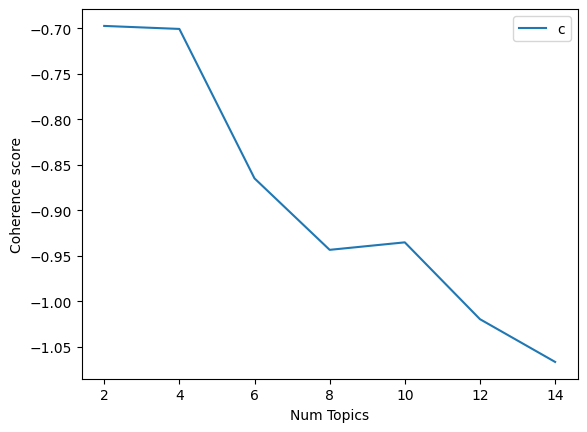

In [49]:
# Show graph
limit=16; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()


In [53]:

# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))
    
# Select the model and print the topics
optimal_model = model_list[0]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

2024-03-30 21:56:15,221 : INFO : topic #0 (0.099): 0.005*"疫情" + 0.004*"生态" + 0.004*"科技" + 0.004*"加快" + 0.004*"治理" + 0.004*"法治" + 0.003*"安全" + 0.003*"文明" + 0.003*"保护" + 0.003*"产业"
2024-03-30 21:56:15,222 : INFO : topic #1 (0.142): 0.005*"马克思主义" + 0.004*"教育" + 0.004*"革命" + 0.003*"—" + 0.003*"民族" + 0.003*"脱贫" + 0.003*"干部" + 0.002*"奋斗" + 0.002*"…" + 0.002*"斗争"


Num Topics = 2  has Coherence Value of -0.6975
Num Topics = 4  has Coherence Value of -0.7008
Num Topics = 6  has Coherence Value of -0.8649
Num Topics = 8  has Coherence Value of -0.9434
Num Topics = 10  has Coherence Value of -0.9352
Num Topics = 12  has Coherence Value of -1.0195
Num Topics = 14  has Coherence Value of -1.0665
[(0,
  '0.005*"疫情" + 0.004*"生态" + 0.004*"科技" + 0.004*"加快" + 0.004*"治理" + 0.004*"法治" '
  '+ 0.003*"安全" + 0.003*"文明" + 0.003*"保护" + 0.003*"产业"'),
 (1,
  '0.005*"马克思主义" + 0.004*"教育" + 0.004*"革命" + 0.003*"—" + 0.003*"民族" + '
  '0.003*"脱贫" + 0.003*"干部" + 0.002*"奋斗" + 0.002*"…" + 0.002*"斗争"')]


In [ ]:
# probably need to remove … and - with the same function I remove punctuation

In [1]:
# check this link on evaluating the models: https://stackoverflow.com/questions/54762690/evaluation-of-topic-modeling-how-to-understand-a-coherence-value-c-v-of-0-4